In [1]:
#import libraries 
import pandas as pd
import matplotlib.pylab as plt
import numpy as np
import seaborn as sns
%matplotlib inline 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot as plt

# Read in data and check for missing values

In [2]:
df = pd.read_csv("combined.csv")
df.head()


,ID,vowel,file,f0,duration,f11,f21,f31,f41,f12,...,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47
0,1,a,AK28a,95.4,0.124,619,1863,2450,3427,611,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,a,AK28a2,97.3,0.080,594,1979,2565,3341,592,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,a,AK28a3,105.8,0.096,517,1916,2703,3882,515,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,e,AK28e,136.9,0.122,335,2147,2966,3567,351,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,e,AK28e2,116.6,0.150,385,2204,2745,3358,340,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
#check for missing data
missing_data = df.isnull()
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")

ID
False    232
Name: ID, dtype: int64

vowel
False    232
Name: vowel, dtype: int64

file
False    232
Name: file, dtype: int64

f0
False    232
Name: f0, dtype: int64

duration
False    232
Name: duration, dtype: int64

f11
False    232
Name: f11, dtype: int64

f21
False    232
Name: f21, dtype: int64

f31
False    232
Name: f31, dtype: int64

f41
False    232
Name: f41, dtype: int64

f12
False    232
Name: f12, dtype: int64

f22
False    232
Name: f22, dtype: int64

f32
False    232
Name: f32, dtype: int64

f42
False    232
Name: f42, dtype: int64

f13
False    232
Name: f13, dtype: int64

f23
False    232
Name: f23, dtype: int64

f33
False    232
Name: f33, dtype: int64

f43
False    232
Name: f43, dtype: int64

f14
False    232
Name: f14, dtype: int64

f24
False    232
Name: f24, dtype: int64

f34
False    232
Name: f34, dtype: int64

f44
False    232
Name: f44, dtype: int64

f15
False    232
Name: f15, dtype: int64

f25
False    232
Name: f25, dtype: int64

f35
False    232
Name:

# Aggregate data by speaker and vowel

In [4]:
#aggregate
df_means_vowels = df.groupby(['ID', 'vowel'], as_index=False)['f0', 'f11', 'f21', 'f31', 'f41', 'duration'].mean()
df_means_vowels.head()

/Users/kristinpredeck/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,ID,vowel,f0,f11,f21,f31,f41,duration
0,1,a,99.500000,576.666667,1919.333333,2572.666667,3550.000000,0.100000
1,1,e,126.750000,360.000000,2175.500000,2855.500000,3462.500000,0.136000
2,2,a,133.133333,478.333333,1743.666667,2783.000000,3986.000000,0.172000
3,2,e,152.033333,395.666667,2030.333333,2610.666667,3542.333333,0.168667
4,3,a,110.000000,576.333333,1789.666667,2524.666667,3641.333333,0.214667


# Visualize data

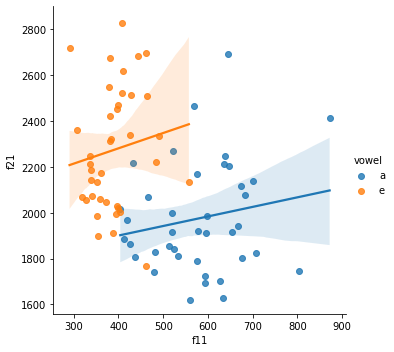

In [5]:
#make vowel plot 
vowels = sns.lmplot( x="f11", y="f21", data=df_means_vowels, hue='vowel', legend=True)

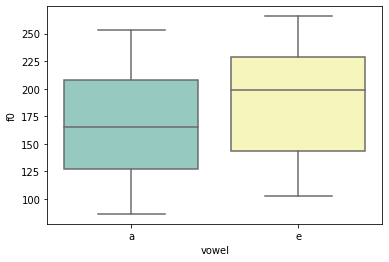

In [6]:
#make  plot for f0
f0 = sns.boxplot(x="vowel", y="f0",data=df_means_vowels, palette="Set3")

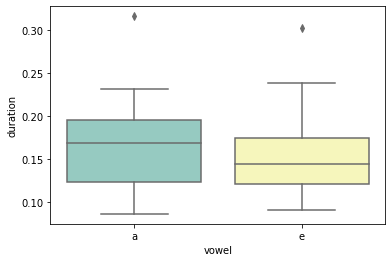

In [7]:
#make  plot for duration
dur = sns.boxplot(x="vowel", y="duration",data=df_means_vowels, palette="Set3")

# Convert categorical variable to numeric values for regression

In [8]:
#replace categorical variable with numeric values
df_means_vowels['vowel'].replace(to_replace=['a','e'], value=[0,1],inplace=True)

In [9]:
df_means_vowels.head()

,ID,vowel,f0,f11,f21,f31,f41,duration
0,1,0,99.500000,576.666667,1919.333333,2572.666667,3550.000000,0.100000
1,1,1,126.750000,360.000000,2175.500000,2855.500000,3462.500000,0.136000
2,2,0,133.133333,478.333333,1743.666667,2783.000000,3986.000000,0.172000
3,2,1,152.033333,395.666667,2030.333333,2610.666667,3542.333333,0.168667
4,3,0,110.000000,576.333333,1789.666667,2524.666667,3641.333333,0.214667


# Build regression

In [10]:
#build multiple linear regression
lm = LinearRegression()
Z = df_means_vowels[['f11', 'f21', 'f31', 'f41', 'f0', 'duration']]
Y = df_means_vowels['vowel']

In [11]:
multiple = lm.fit(Z, Y)

In [12]:
print('The R-square is: ', lm.score(Z, df_means_vowels['vowel']))

The R-square is:  0.6960716998527969


In [13]:
Y_predict_multifit = lm.predict(Z)
print('The mean square error of vowel and predicted vowel using multifit is: ', \
      mean_squared_error(df_means_vowels['vowel'], Y_predict_multifit))

The mean square error of vowel and predicted vowel using multifit is:  0.07598207503680077


In [14]:
lm.intercept_

1.105525776450226

In [15]:
lm.coef_

array([-2.63430489e-03,  3.69821736e-04,  1.84819133e-04, -2.41036640e-04,
        2.30201968e-03, -8.23041683e-01])

In [16]:
from statsmodels.regression.linear_model import OLS
from statsmodels.tools.tools import add_constant

#find out which variables are showing multicollinearity 
def variance_inflation_factors(exog_df):
    '''
    Parameters
    ----------
    exog_df : dataframe, (nobs, k_vars)
        design matrix with all explanatory variables, as for example used in
        regression.

    Returns
    -------
    vif : Series
        variance inflation factors
    '''
    exog_df = add_constant(exog_df)
    vifs = pd.Series(
        [1 / (1. - OLS(exog_df[col].values, 
                       exog_df.loc[:, exog_df.columns != col].values).fit().rsquared) 
         for col in exog_df],
        index=exog_df.columns,
        name='VIF'
    )
    return vifs

In [17]:
#show VIF values 
variance_inflation_factors(df_means_vowels)

const       192.425031
ID            2.389469
vowel         3.298214
f0            3.453914
f11           3.268881
f21           5.001538
f31           6.161916
f41           3.486565
duration      1.180577
Name: VIF, dtype: float64

In [18]:
df_means_vowels.corr(method='pearson')

,ID,vowel,f0,f11,f21,f31,f41,duration
ID,1.000000,0.000000,0.718283,0.289483,0.454878,0.421857,0.480027,0.090082
vowel,0.000000,1.000000,0.193483,-0.748405,0.513652,0.419382,0.075236,-0.145756
f0,0.718283,0.193483,1.000000,0.169158,0.627818,0.655989,0.605952,0.190300
f11,0.289483,-0.748405,0.169158,1.000000,-0.294494,-0.193023,0.126260,0.158915
f21,0.454878,0.513652,0.627818,-0.294494,1.000000,0.857577,0.665095,0.135631
f31,0.421857,0.419382,0.655989,-0.193023,0.857577,1.000000,0.774261,0.102099
f41,0.480027,0.075236,0.605952,0.126260,0.665095,0.774261,1.000000,0.264445
duration,0.090082,-0.145756,0.190300,0.158915,0.135631,0.102099,0.264445,1.000000


In [51]:
#import packages 
import statsmodels.api as sm
from patsy import dmatrices

#build model
y, X = dmatrices('vowel ~ f11 + f21 + f31 + f41 + f0 + duration', data=df_means_vowels, return_type='dataframe')

In [52]:
#describe model
mod = sm.OLS(y, X)

#fit model
res = mod.fit()       

#print summary
print(res.summary())   

                            OLS Regression Results                            
Dep. Variable:                  vowel   R-squared:                       0.696
Model:                            OLS   Adj. R-squared:                  0.670
Method:                 Least Squares   F-statistic:                     27.10
Date:                Wed, 15 Jul 2020   Prob (F-statistic):           1.48e-16
Time:                        12:12:08   Log-Likelihood:                -10.164
No. Observations:                  78   AIC:                             34.33
Df Residuals:                      71   BIC:                             50.83
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.1055      0.428      2.584      0.0

In [53]:
res.params

Intercept    1.105526
f11         -0.002634
f21          0.000370
f31          0.000185
f41         -0.000241
f0           0.002302
duration    -0.823042
dtype: float64

# Make predictions 

In [28]:
#split data to predict vowels using our predictors
from IPython.display import display
from IPython.html import widgets 
from IPython.display import display
from ipywidgets import interact, interactive, fixed, interact_manual

/Users/kristinpredeck/opt/anaconda3/lib/python3.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [29]:

def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))

    ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
    ax2 = sns.distplot(BlueFunction, hist=False, color="b", label=BlueName, ax=ax1)

    plt.title(Title)
    plt.xlabel('Vowel')
    plt.ylabel('Proportion of Vowels')

    plt.show()
    plt.close()

In [ ]:
def PollyPlot(xtrain, xtest, y_train, y_test, lr,poly_transform):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))
    
    
    #training data 
    #testing data 
    # lr:  linear regression object 
    #poly_transform:  polynomial transformation object 
 
    xmax=max([xtrain.values.max(), xtest.values.max()])

    xmin=min([xtrain.values.min(), xtest.values.min()])

    x=np.arange(xmin, xmax, 0.1)


    plt.plot(xtrain, y_train, 'ro', label='Training Data')
    plt.plot(xtest, y_test, 'go', label='Test Data')
    plt.plot(x, lr.predict(poly_transform.fit_transform(x.reshape(-1, 1))), label='Predicted Function')
    plt.ylim([-10000, 60000])
    plt.ylabel('Height')
    plt.legend()

In [30]:
y_data = df_means_vowels['vowel']
x_data=df_means_vowels.drop('vowel',axis=1)

In [31]:
from sklearn.model_selection import train_test_split


x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.15, random_state=1)


print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples : 12
number of training samples: 66


In [32]:
lr = LinearRegression()
lr.fit(x_train[['f11', 'f21', 'f31', 'f41', 'f0', 'duration']], y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [33]:
#Prediction using training data:

yhat_train = lr.predict(x_train[['f11', 'f21', 'f31', 'f41', 'f0', 'duration']])
yhat_train[0:5]

array([0.23790828, 0.8647071 , 0.25892798, 0.119326  , 1.07159285])

In [34]:
#Prediction using test data:

yhat_test = lr.predict(x_test[['f11', 'f21', 'f31', 'f41', 'f0', 'duration']])
yhat_test[0:5]

array([0.13012876, 0.8494715 , 0.10236263, 0.78504549, 0.91327351])

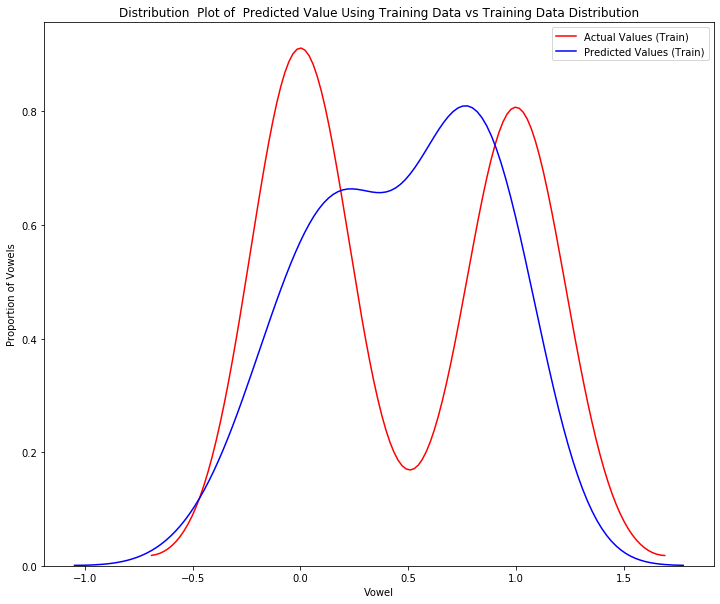

In [35]:
#examine the distribution of the predicted values of the training data.

Title = 'Distribution  Plot of  Predicted Value Using Training Data vs Training Data Distribution'
DistributionPlot(y_train, yhat_train, "Actual Values (Train)", "Predicted Values (Train)", Title)

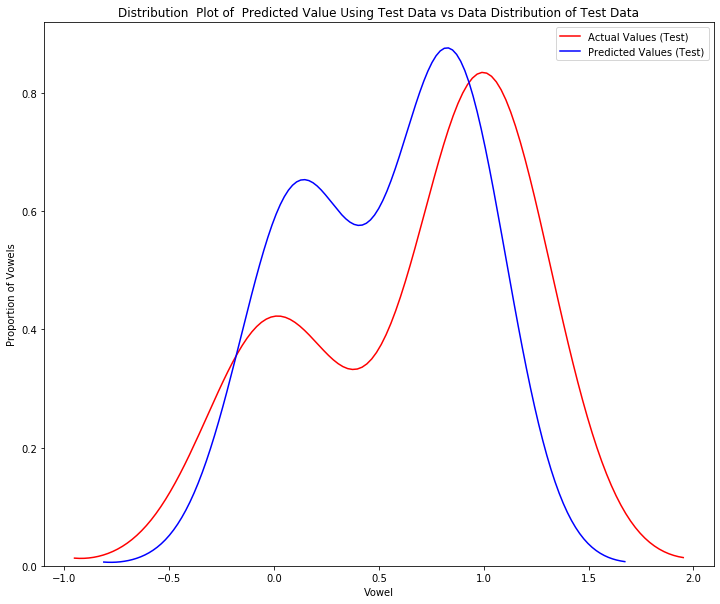

In [36]:
#what happens when the model encounters new data from the testing dataset? es.

Title='Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data'
DistributionPlot(y_test,yhat_test,"Actual Values (Test)","Predicted Values (Test)",Title)